Para o trabalho final, cada aluno deverá utilizar os dados presentes no arquivo indicadores.xlsx. A partir desse conjunto de dados, você deverá selecionar duas ou mais colunas e desenvolver um programa em Python que realize as seguintes análises estatísticas:

- Cálculo da média
- Cálculo da mediana
- Determinação do valor máximo
- Determinação do valor mínimo?
- Cálculo do valor p
- Regressão linear
- Análise de distribuições
- Geração dos gráficos correspondentes às análises realizadas

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_excel('indicadores.xlsx')
df.head(1)

,ano,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2005,estadual,fundamental,finais (6-9),763,76363516,23286,2266,43243699,33,NaN


In [ ]:
def calcularMedias():
    soma1 = 0
    qtd1 = 0
    for v in df['taxa_aprovacao'].tolist():
        if not np.isnan(v):
            soma1 += v
            qtd1 += 1
    mediaTaxa = soma1 / qtd1

    soma2 = 0
    qtd2 = 0
    
    for v in df['nota_saeb_matematica'].tolist():
        if not np.isnan(v):
            soma2 += v
            qtd2 += 1
    mediaSaeb = soma2 / qtd2

    return mediaTaxa, mediaSaeb


mediaTaxa, mediaSaeb = calcularMedias()

print("Taxa de aprovação:", mediaTaxa)
print("Nota SAEB Matemática:", mediaSaeb)

Taxa de aprovação: 814.8809523809524
Nota SAEB Matemática: 23089.579365079364


In [12]:
def calcularMediana():
    taxaAprovacao = df['taxa_aprovacao'].tolist()
    
    taxaAprovacao = [v for v in taxaAprovacao if not np.isnan(v)]
    taxaAprovacao.sort()
    
    if len(taxaAprovacao) % 2 == 0:
        mid1 = taxaAprovacao[len(taxaAprovacao)//2 - 1]
        mid2 = taxaAprovacao[len(taxaAprovacao)//2]
        midT = (mid1 + mid2) / 2
    else:
        midT = taxaAprovacao[len(taxaAprovacao)//2]

    return midT

print("Mediana da taxa de aprovação:", calcularMediana())

Mediana da taxa de aprovação: 869.5


In [15]:
def mostrarMax():
    ideb = df['ideb'].tolist()
    maiorNotaPt = df['nota_saeb_lingua_portuguesa'].tolist()

    maiorNotaPt = [v for v in maiorNotaPt if not np.isnan(v)]
    ideb = [v for v in ideb if not np.isnan(v)]
    
    maxNotaPt = max(maiorNotaPt)
    maxIdeb = max(ideb)
    return maxIdeb, maxNotaPt

print("Maior IDEB:", mostrarMax()[0])
print("Maior nota SAEB Língua Portuguesa:", mostrarMax()[1])

Maior IDEB: 71
Maior nota SAEB Língua Portuguesa: 31502


In [16]:
def mostrarMin():
    notaSaebMat = df['nota_saeb_matematica'].tolist()
    menorProj = df['projecao'].tolist()

    menorProj = [v for v in menorProj if not np.isnan(v)]
    notaSaebMat = [v for v in notaSaebMat if not np.isnan(v)]

    minSaeb = min(notaSaebMat)
    menorProj = min(menorProj)
    return minSaeb, menorProj

print("Menor nota SAEB Matemática:", mostrarMin()[0])
print("Menor projeção:", mostrarMin()[1])

Menor nota SAEB Matemática: 271
Menor projeção: 4.0


In [ ]:
# o que caralhos é o valor p ? Nao sei, ver depois

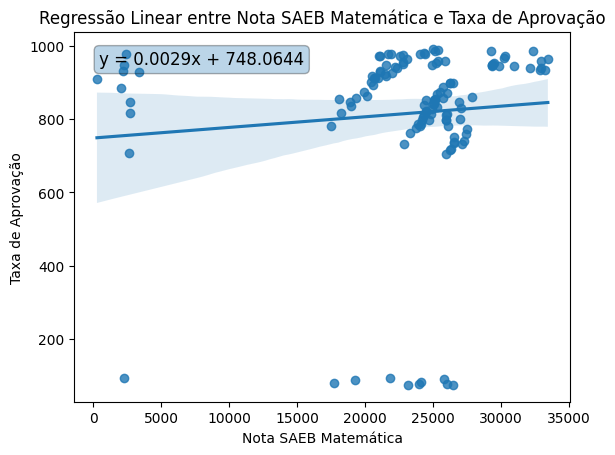

In [19]:
def regLinear():
    x = df['nota_saeb_matematica']
    y = df['taxa_aprovacao']

    # (a = inclinação, b = onde corta o y)
    a, b = np.polyfit(x, y, 1)

    sns.regplot(x=x, y=y)

    plt.xlabel('Nota SAEB Matemática')
    plt.ylabel('Taxa de Aprovação')
    plt.title('Regressão Linear entre Nota SAEB Matemática e Taxa de Aprovação')

    # Mostrar a equação da reta no gráfico
    equacao = f"y = {a:.4f}x + {b:.4f}"
    plt.text(
        0.05, 0.95, 
        equacao,
        transform=plt.gca().transAxes,
        fontsize=12,
        verticalalignment='top',
        bbox=dict(boxstyle='round', alpha=0.3)
    )

    plt.show()

regLinear()
